<a href="https://colab.research.google.com/github/anushkagupta0203/GeeksforGeeks-Content/blob/main/GeeksforGeeks_Content.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
anushkagupta23_gfg_content_path = kagglehub.dataset_download('anushkagupta23/gfg-content')

print('Data source import complete.')


Data source import complete.


In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gfg-content/articles.csv


In [10]:
df=pd.read_csv('/kaggle/input/gfg-content/articles.csv')

In [11]:
df.head()

,title,author_id,last_updated,link,category
0,5 Best Practices For Writing SQL Joins,priyankab14,"21 Feb, 2022",https://www.geeksforgeeks.org/5-best-practices...,easy
1,Foundation CSS Dropdown Menu,ishankhandelwals,"20 Feb, 2022",https://www.geeksforgeeks.org/foundation-css-d...,easy
2,Top 20 Excel Shortcuts That You Need To Know,priyankab14,"17 Feb, 2022",https://www.geeksforgeeks.org/top-20-excel-sho...,easy
3,Servlet – Fetching Result,nishatiwari1719,"17 Feb, 2022",https://www.geeksforgeeks.org/servlet-fetching...,easy
4,Suffix Sum Array,rohit768,"21 Feb, 2022",https://www.geeksforgeeks.org/suffix-sum-array/,easy


In [12]:
#gives non-meaningful information as some columns has both numeric and string data
df.describe()

,title,author_id,last_updated,link,category
count,34574,34555,34556,34574,34574
unique,34099,5591,1962,34555,5
top,GATE | GATE CS 2013 | Question 65,GeeksforGeeks,"28 Jun, 2021",https://www.geeksforgeeks.org/how-to-save-an-e...,medium
freq,19,11957,1285,2,10440


In [13]:
df.isnull().sum()

,0
title,0
author_id,19
last_updated,18
link,0
category,0


In [14]:
#rows and columns in datset
df.shape

(34574, 5)

In [15]:
df.shape[0]

34574

In [16]:
df.shape[1]

5

since in 34K rows only 19 rows have null values we prefer to remove rows

In [17]:
df.dropna(inplace = True)

In [18]:
df.isnull().sum()

,0
title,0
author_id,0
last_updated,0
link,0
category,0


Finding the most popular author (in terms of the number of articles

In [19]:
df.groupby('author_id').size().sort_values(ascending = False).head()

,0
author_id,
GeeksforGeeks,11957
ManasChhabra2,317
Striver,265
manjeet_04,246
Chinmoy Lenka,192


Day-wise Analysis of Articles Frequency

(in last_updated column at some places we had category values given)

In [20]:
df = df[df['last_updated'] != 'Easy']
df = df[df['last_updated'] != 'Basic']
df = df[df['last_updated'] != 'Medium']
df = df[df['last_updated'] != 'Hard']
df = df[df['last_updated'] != 'Expert']

data = df.values

day   = []
month = []
year  = []

for i in range(len(data)):
    day.append(int(data[i][2].split(' ')[0]))
    month.append(data[i][2].split(' ')[1][:-1])
    year.append(int(data[i][2].split(' ')[2]))

df['day']   = day
df['month'] = month
df['year']  = year

In [21]:
df.head()

,title,author_id,last_updated,link,category,day,month,year
0,5 Best Practices For Writing SQL Joins,priyankab14,"21 Feb, 2022",https://www.geeksforgeeks.org/5-best-practices...,easy,21,Feb,2022
1,Foundation CSS Dropdown Menu,ishankhandelwals,"20 Feb, 2022",https://www.geeksforgeeks.org/foundation-css-d...,easy,20,Feb,2022
2,Top 20 Excel Shortcuts That You Need To Know,priyankab14,"17 Feb, 2022",https://www.geeksforgeeks.org/top-20-excel-sho...,easy,17,Feb,2022
3,Servlet – Fetching Result,nishatiwari1719,"17 Feb, 2022",https://www.geeksforgeeks.org/servlet-fetching...,easy,17,Feb,2022
4,Suffix Sum Array,rohit768,"21 Feb, 2022",https://www.geeksforgeeks.org/suffix-sum-array/,easy,21,Feb,2022


<Axes: xlabel='day'>

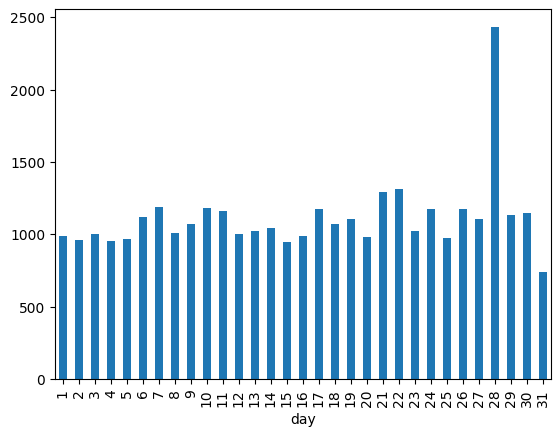

In [22]:
df.groupby('day').size().plot(kind = 'bar')

Month-wise Analysis of Articles Frequency

<Axes: xlabel='month'>

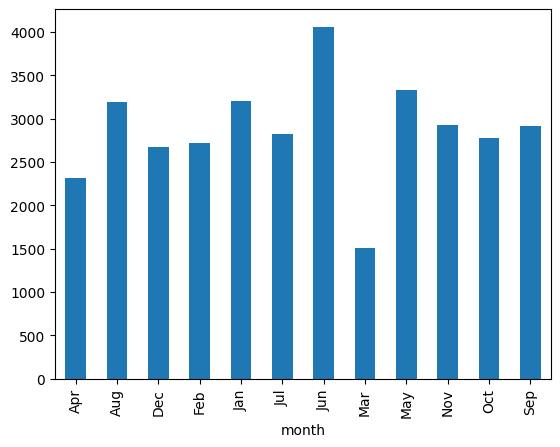

In [23]:
df.groupby('month').size().plot(kind = 'bar')

Year-wise Analysis of Articles Frequency

<Axes: xlabel='year'>

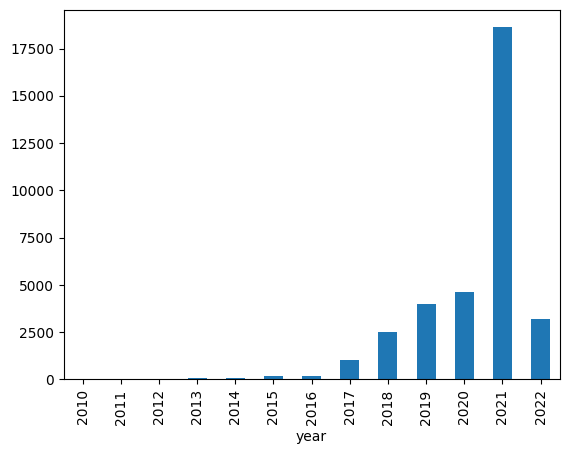

In [24]:
df.groupby('year').size().plot(kind = 'bar')

Category Analysis Distribution

<Axes: xlabel='category'>

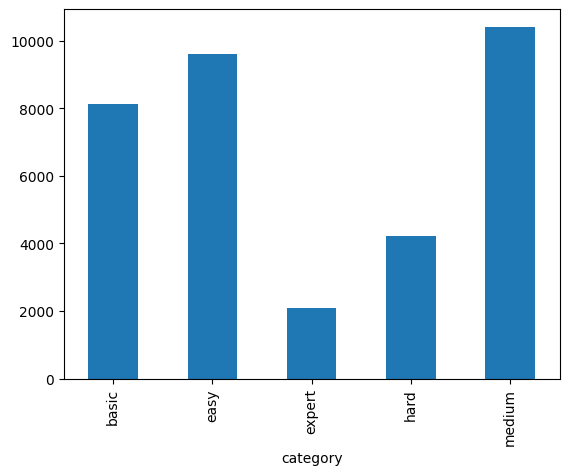

In [25]:
df.groupby('category').size().plot(kind = 'bar')

<Axes: >

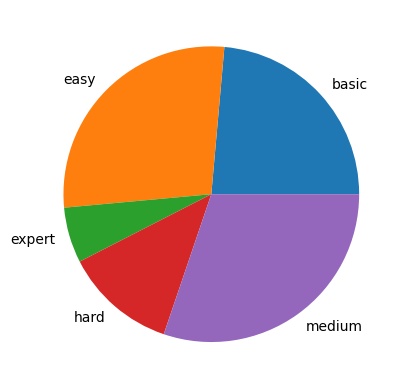

In [26]:
df.groupby('category').size().plot(kind = 'pie')

In [27]:
Finding articles of your favorite Author

SyntaxError: invalid syntax (<ipython-input-27-35d54c29aa91>, line 1)

In [ ]:
df[df['author_id'] == 'Chinmoy Lenka']

Finding articles based on tags(like python)

In [ ]:
c=0
keywords=['python','data']
for i in data:
    if all(keyword in i[0].lower() for keyword in keywords):
        c+=1
        print(i[0])

print(c)